shape of raster (4000, 4000)
unique values in raster [  0   1   2   3  13  14  22  31  32  33  34  35  42  45  46  50  51  52
  65  67  69  71  74  77  80  81  91  95  96  99 100 104 112 114 117 119
 121 124 128 130 132 133 135 136 137 140 141 144 146 147 152 154 156 159
 164 165 166 167 168 169 170 171 173 177 179 181 182 183 184 187 193 197
 199 200 203 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
img shape: (4000, 4000)


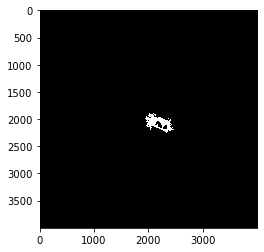

img shape: (500, 600)


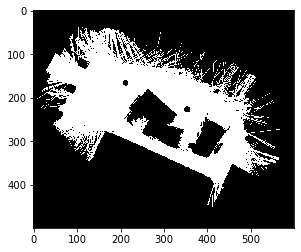

img shape: (500, 600)


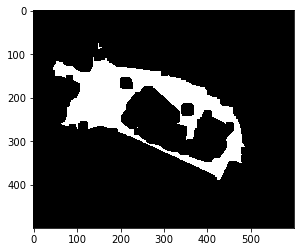

In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#读入pgm格式文件，并把像素值转化成矩阵
#因为这个pgm文件比较大，我们不能用f.readlines()或者read()一次性读取，而是一个数值一个数值的装进矩阵，否则会导致卡顿。
#建议以二进制读取文件，然后再解码
def read_pgm(pgm_name, encoding):
    """Return a raster of integers from a PGM as a list of lists."""
    pgmf = open(pgm_name, 'rb')
    assert pgmf.readline().decode(encoding) == 'P5\n'
    #pgmf.readline()
    (width, height) = [int(i) for i in pgmf.readline().decode(encoding).split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    raster = np.array(raster)
    return raster

#如果想要存下来处理得到的数组矩阵以后用
#存矩阵
def save_arr(arr, fpath):
    with open(fpath, 'wb') as f:
        np.save(f, arr)
#加载矩阵
def load_arr(fpath):
    with open(fpath, 'rb') as f:
        return np.load(f)

#map1 = load_arr('allen1_safeguard.npy')

#检查地图上某点是否为障碍
def state_validity_check(Map, config):
    return Map[config]==0



# Plot img
#可视化像素矩阵，发现黑色区域太大，显得目标区域太小，因此对矩阵进行slicing
#for arr here, 0 denotes no obstacle, 1 denotes obstacle
def visual(arr, threshold):
    if threshold!=None:
        arr[arr<threshold]=1
        arr[arr>=threshold]=0
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    visit_map = 1 - np.copy(arr) # black is obstacle, white is free space
    ax1_img = ax1.imshow(visit_map, interpolation="nearest", cmap="gray")
    print('img shape:', arr.shape)
    plt.show()
    
#人为缩小无障碍区域，防止小车容易撞到障碍物
def config_space(m, dist):
    m2 = np.ones_like(m)
    h, w = m.shape
    for i in range(h):
        for j in range(w):
            if i<dist or i>=w-dist or j<dist or j>=w-dist:
                continue
            if m[i-dist:i+dist, j-dist:j+dist].sum()==0:
                m2[i,j] = 0
                #print(i,j)
    return m2

pgm_name = 'allen1_brushed.pgm'
pgm_name1='real-floor4_corridor.pgm'
raster = read_pgm(pgm_name, 'utf-8')
print('shape of raster', raster.shape)
print('unique values in raster', np.unique(raster))
#因为笔刷饱和度或者深度啥的略有误差，即使人眼看上去是白色，但实际上并不是254，所以我们降低阈值为210
visual(raster, threshold = 210)
#裁剪过宽的黑色边缘
raster1 = raster
raster1 = raster[1850:2350,1900:2500]
visual(raster1, threshold = None)
#人为缩小无障碍区域，防止小车容易撞到障碍物
safe_raster1 = config_space(raster1, dist=8)
visual(safe_raster1, None)

In [6]:
start = (150, 100)
goal = (365, 415)
state_validity_check(safe_raster1, start)
state_validity_check(safe_raster1, goal)

True

In [62]:
save_arr(safe_raster1.astype('int8'), fpath='allen1_safeguard_notcrop_d8.npy')

In [20]:
'''
plan = np.load('plan.npy')
sum_v = 0
for x,y in plan:
    x= int(x[0])
    y= int(y[0])
#     print(x,y)
    sum_v+=raster2[x,y]
print(sum_v)

'''

0
